In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

In [2]:
# loading training data
df = pd.read_csv('../Data/demo_data/3.concertriccir2.csv', names=['x', 'y', 'class'])
print(df.head())

X = df.iloc[:, 0:2]
y = df['class']
X.shape

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


(500, 2)

# Simple Cross Validation

In [3]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

scores= {}
for i in range(1,30,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_tr, y_tr)
    
    pred = clf.predict(X_cv)
    
    cv_acc  = accuracy_score(y_cv, pred, normalize=True) * float(100)
    
    scores[i]= cv_acc
    

In [4]:
optimal_k = max(scores, key= scores.get) 
optimal_k

3

In [5]:
clf = KNeighborsClassifier(n_neighbors = optimal_k)
clf.fit(X_tr, y_tr)
    
pred = clf.predict(X_test)
    
test_acc  = accuracy_score(y_test, pred, normalize=True) * float(100)
test_acc

88.0

KNN on the data using 49% of the data (0.7*0.7) gives an aacuracy of 90%



Here only 49% of data is used, so we use K- fold cross validation for less data loss.

# 5 fold cross validation

In [6]:
neighbors = list(range(1,50,2)) #odd values for the value of K

cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_1, y_1, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
MSE


[0.10857142857142854,
 0.10857142857142854,
 0.09999999999999998,
 0.11142857142857143,
 0.12571428571428578,
 0.14571428571428569,
 0.12857142857142867,
 0.16857142857142848,
 0.17428571428571416,
 0.18285714285714272,
 0.19714285714285718,
 0.21714285714285708,
 0.22571428571428576,
 0.24857142857142855,
 0.26857142857142846,
 0.2885714285714285,
 0.3028571428571428,
 0.30000000000000004,
 0.32000000000000006,
 0.32571428571428584,
 0.3400000000000001,
 0.34857142857142853,
 0.3600000000000001,
 0.3628571428571429,
 0.37428571428571433]

In [7]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)



The optimal number of neighbors is 5.


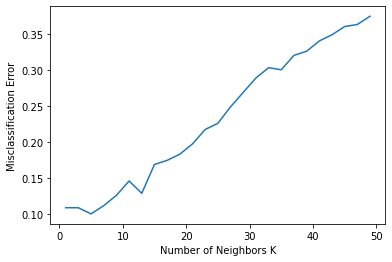

In [8]:
plt.plot(neighbors, MSE)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [9]:
clf = KNeighborsClassifier(n_neighbors = optimal_k)
clf.fit(X_tr, y_tr)
    
pred = clf.predict(X_test)
    
test_acc  = accuracy_score(y_test, pred, normalize=True) * float(100)
test_acc

87.33333333333333

KNN on the data using 70% of the data gives an aacuracy of 85.3%